In [36]:
import scipy.io as sio
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D

### Pacejka Magic Formula

In [37]:
def fit(data, a0, a1, a2, a3, a4, a5, a6, a7, a8, a9, a10, a11, a12, a13, a14, a15, a16, a17):
    FZ = data[0]
    SA = data[1]
    IA = data[2]

    C = a0
    D = FZ * (a1 * FZ + a2) * (1 - a15 * IA**2)
    
    BCD = a3 * np.sin(np.arctan(FZ / a4) * 2) * (1 - a5 * abs(IA))
    B = BCD / (C * D)
    H = a8 * FZ + a9 + a10 * IA

    E = (a6 * FZ + a7) * (1 - (a16 * IA + a17) * np.sign(SA + H))

    V = a11 * FZ + a12 + (a13 * FZ + a14) * IA * FZ
    Bx1 = B * (SA + H)

    return D * np.sin(C * np.arctan(Bx1 - E * (Bx1 - np.arctan(Bx1)))) + V

### Desired Parameters for Filtering

In [38]:
tires = {"hoosier_r25b_18x7-5_10x8":{"long":None, "lat":None}}

camber = 0 # default camber
pressure = 12 * 6.89476 # default pressure
velocity = 25 * 1.60934 # default velocity
slip_angle = 0
run_num = 1


### Import and Filter Tire Data

In [39]:
for name, tire in tires.items():
    try:
        df = pd.read_csv(f"../tire_data/processed_data/braking_{name}.csv")
        tire["long"] = df[(df["pressure"] == pressure) & (df["velocity"] == velocity)]
        # print(tire["long"])
        
    except:
        print("Error getting long data for {0}".format(name))

    try:
        df = pd.read_csv(f"../tire_data/processed_data/cornering_{name}.csv")
        tire["lat"] = df[(df["velocity"] == velocity) & (df["pressure"] == pressure)]
        # print(tire["lat"])

    except:
        print("Error getting lateral data for {0}".format(name))

### Pacejka Fit Solver

In [41]:
df = tires["hoosier_r25b_18x7-5_10x8"]["lat"]

x_lst = df["FZ"].tolist()
y_lst = df["SA"].tolist()
z_lst = df["IA"].tolist()

w_lst = df["FY"].tolist()

a_vals = [1.5, 0, 1100, 1100, 0, 0, -2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

parameters, covariance = curve_fit(fit, [x_lst, y_lst, z_lst], w_lst, a_vals, maxfev = 10000)

print("Coefficients:", parameters)


C:\Users\rober\AppData\Local\Temp\ipykernel_19460\3638730800.py:9: RuntimeWarning: divide by zero encountered in true_divide
  BCD = a3 * np.sin(np.arctan(FZ / a4) * 2) * (1 - a5 * abs(IA))


Coefficients: [ 2.66741583e-02  6.55845271e-04  1.26930408e+02  8.24330604e+02
  1.68219790e+03  5.35927916e-02 -1.44051587e-04  1.01443196e+00
  2.19546598e-04  4.03096829e-02 -1.64510808e-01  7.12814981e-02
  1.92456919e+01  4.83329128e-05  7.17402480e-02  5.66510022e-03
 -1.73937412e-03 -1.06458477e-02]


### Plotting

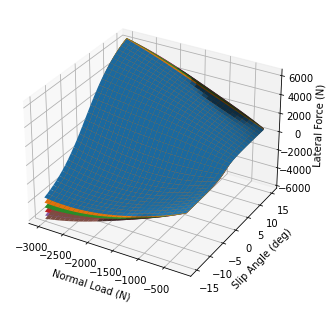

In [42]:
model_x_data = np.linspace(-3000, -200, 30)
model_y_data = np.linspace(-15, 15, 30)

X, Y = np.meshgrid(model_x_data, model_y_data)

fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)

for i in [-5, -4, -3, -2, -1, 0]:

    W = fit(np.array([X, Y, i], dtype=object), *parameters) * -1

    fig.add_axes(ax)
    ax.plot_surface(X, Y, W)

ax.set_xlabel('Normal Load (N)')
ax.set_ylabel('Slip Angle (deg)')
ax.set_zlabel('Lateral Force (N)')

plt.show()

C:\Users\rober\AppData\Local\Temp\ipykernel_19460\3638730800.py:10: RuntimeWarning: invalid value encountered in double_scalars
  B = BCD / (C * D)


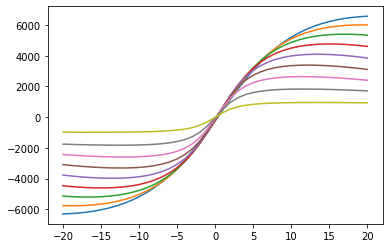

In [76]:
model_x_data = np.linspace(-2000, 0, 10)
model_y_data = np.linspace(-15, 15, 30)

X, Y = np.meshgrid(model_x_data, model_y_data)

for normal_load in model_x_data:
    W_2D = []
    for SA in range(-20, 21):
        W = fit([normal_load, range(-20, 21), 0], *parameters) * -1

        W_2D.append(W)
    plt.plot([x for x in range(-20, 21)], W_2D[0])

plt.show()